# 第8章: 機械学習
本章では，Bo Pang氏とLillian Lee氏が公開している[Movie Review Data](http://www.cs.cornell.edu/people/pabo/movie-review-data/)の[sentence polarity dataset v1.0](http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.README.1.0.txt)を用い，文を肯定的（ポジティブ）もしくは否定的（ネガティブ）に分類するタスク（極性分析）に取り組む．

In [1]:
! curl -o rt-polaritydata.tar.gz http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  476k  100  476k    0     0   193k      0  0:00:02  0:00:02 --:--:--  193k


In [2]:
! tar -zxvf rt-polaritydata.tar.gz

rt-polaritydata.README.1.0.txt
rt-polaritydata/rt-polarity.neg
rt-polaritydata/rt-polarity.pos


## 70. データの入手・整形
[文に関する極性分析の正解データ](http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz)を用い，以下の要領で正解データ（sentiment.txt）を作成せよ．

1. rt-polarity.posの各行の先頭に"+1 "という文字列を追加する（極性ラベル"+1"とスペースに続けて肯定的な文の内容が続く）
2. rt-polarity.negの各行の先頭に"-1 "という文字列を追加する（極性ラベル"-1"とスペースに続けて否定的な文の内容が続く）
3. 上述1と2の内容を結合（concatenate）し，行をランダムに並び替える

sentiment.txtを作成したら，正例（肯定的な文）の数と負例（否定的な文）の数を確認せよ．

In [3]:
from random import shuffle

In [4]:
with open("./rt-polaritydata/rt-polarity.pos", mode="r", encoding="cp1252") as pos_file:
    pos = pos_file.readlines()
with open("./rt-polaritydata/rt-polarity.neg", mode="r", encoding="cp1252") as neg_file:
    neg = neg_file.readlines()

In [5]:
lines = []
for line in pos:
    lines.append("+1 " + line.strip())
for line in neg:
    lines.append("-1 " + line.strip())
shuffle(lines)

# print(lines[:5])

In [6]:
with open("./sentiment.txt", mode="w", encoding="utf-8") as out_file:
    for line in lines:
        out_file.write(line + "\n")

In [7]:
pos_count, neg_count = 0, 0
with open("./sentiment.txt", mode="r", encoding="utf-8") as sentiment_file:
    for line in sentiment_file.readlines():
        if line.startswith("+"):
            pos_count += 1
        else:
            neg_count += 1
print("pos:\t%d\nneg:\t%d" % (pos_count, neg_count))

pos:	5331
neg:	5331


## 71. ストップワード
英語のストップワードのリスト（ストップリスト）を適当に作成せよ．さらに，引数に与えられた単語（文字列）がストップリストに含まれている場合は真，それ以外は偽を返す関数を実装せよ．さらに，その関数に対するテストを記述せよ．

In [8]:
import nltk

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# http://xpo6.com/list-of-english-stop-words/
list_of_english_stop_words = set(["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"])

In [11]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [12]:
def character_set(*args: tuple) -> set:
    characters = []
    for i in range(len(args)):
        characters.extend([chr(j) for j in range(args[i][0], args[i][1])])
    return set(characters)

In [13]:
stopwords = set(ENGLISH_STOP_WORDS) \
    | set(nltk.corpus.stopwords.words("english")) \
    | set(list_of_english_stop_words) \
    | character_set((97, 123), (65, 91), (48, 58), (65296, 65306))
 
# print(stopwords)

In [14]:
def is_stopword(word):
    return word.lower() in stopwords

In [15]:
assert is_stopword("a")             # リストの先頭
assert is_stopword("your")          # リストの末尾
assert is_stopword("other")         # リストの中間
assert is_stopword("on")            # リストの中間
assert is_stopword("A")             # 大小文字の同一視
assert is_stopword("Your")          # 大小文字の同一視
assert is_stopword("otheR")         # 大小文字の同一視
assert is_stopword("ON")            # 大小文字の同一視

In [16]:
assert not is_stopword('bout')      # 後方一致されない
assert not is_stopword('acros')     # 前方一致されない
assert not is_stopword('fte')       # 中間一致されない
assert not is_stopword(' ')         # 空白
assert not is_stopword('\n')        # 制御コード
assert not is_stopword('')          # 空文字

## 72. 素性抽出
極性分析に有用そうな素性を各自で設計し，学習データから素性を抽出せよ．素性としては，レビューからストップワードを除去し，各単語をステミング処理したものが最低限のベースラインとなるであろう．

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
word_net_lemmatizer = WordNetLemmatizer()

In [20]:
def _tokenizer(text: str) -> list:
    return [word_net_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)]

In [21]:
text_data = []
labels = []
with open("./sentiment.txt", mode="r", encoding="utf-8") as sentiment_file:
    for line in sentiment_file.readlines():
        text_data.append(line[3:].strip())
        labels.append(int(line[:2]))
#         
# print(text_data[:5], labels[:5])

In [22]:
index = int(len(text_data) * 0.8)
train_data, test_data = text_data[:index], text_data[index:]
train_label, test_label = labels[:index], labels[index:]

print("train_data:\t%d\ttest_data:\t%d" % (len(train_data), len(test_data)))
print("train_label:\t%d\ttest_label:\t%d" % (len(train_label), len(test_label)))

train_data:	8529	test_data:	2133
train_label:	8529	test_label:	2133


In [23]:
stopwords = set(ENGLISH_STOP_WORDS) \
    | set(nltk.corpus.stopwords.words("english")) \
    | set(list_of_english_stop_words) \
    | character_set((97, 123), (65, 91), (48, 58), (65296, 65306)) \
    | set(["'d", "'ll", "'re", "'s", "'ve", 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifi', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv', 'anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh', 'le'])

In [24]:
vectorizer = CountVectorizer(max_df=0.5, min_df=2, stop_words=stopwords, tokenizer=_tokenizer)

In [25]:
train_bow = vectorizer.fit_transform(train_data)

In [26]:
feature_names = vectorizer.get_feature_names()
len(feature_names)

7956

## 73. 学習
72で抽出した素性を用いて，ロジスティック回帰モデルを学習せよ．

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(
    random_state=0,
    solver="lbfgs",
    max_iter=500
)

In [29]:
model.fit(train_bow, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 74. 予測
73で学習したロジスティック回帰モデルを用い，与えられた文の極性ラベル（正例なら"+1"，負例なら"-1"）と，その予測確率を計算するプログラムを実装せよ．

In [30]:
test_bow = vectorizer.transform(test_data)
model.score(test_bow, test_label)

0.7360525082044069

## 75. 素性の重み
73で学習したロジスティック回帰モデルの中で，重みの高い素性トップ10と，重みの低い素性トップ10を確認せよ．

In [31]:
weights = model.coef_[0]
important_features = sorted(zip(feature_names, weights), key=lambda x: x[1], reverse=True)

In [32]:
important_features[:10]

[('powerful', 1.9958411493557031),
 ('engrossing', 1.8757600515007866),
 ('unexpected', 1.8183092329088748),
 ('wonderful', 1.739352138666957),
 ('refreshing', 1.7285236244126119),
 ('remarkable', 1.7236123153914584),
 ('warm', 1.7097233710151951),
 ('enjoyable', 1.611386970370426),
 ('terrific', 1.5642444971974074),
 ('unique', 1.545491221898046)]

In [33]:
important_features[-10:]

[('badly', -1.571743990903155),
 ('routine', -1.5870189512696584),
 ('junk', -1.594579982087796),
 ('worst', -1.6063602035219984),
 ('disappointment', -1.6680036108662473),
 ('flat', -1.743618485971725),
 ('bore', -1.8027948272716232),
 ('dull', -1.813768320429803),
 ('boring', -1.8810627095358772),
 ('fails', -1.8925062538410053)]

## 76. ラベル付け
学習データに対してロジスティック回帰モデルを適用し，正解のラベル，予測されたラベル，予測確率をタブ区切り形式で出力せよ．

In [34]:
import numpy as np

In [35]:
def predict(text):
    _bow = vectorizer.transform([text])
    _probability = model.predict_proba(_bow)
    _predict = -1 if np.argmax(_probability[0]) == 0 else 1
    return _predict, _probability[0][np.argmax(_probability[0])]

In [36]:
text = lines[0][3:]
print(lines[0])
predict(text)

-1 the ill-conceived modern-day ending falls flat where it should deliver a moral punch .


(-1, 0.9589707578571035)

In [37]:
for text, label in zip(train_data, train_label):
    _probability_label, _predict_proba = predict(text)
    print("%d\t%d\t%f" % (label, _probability_label, _predict_proba))

-1	-1	0.958971
1	1	0.994852
1	1	0.938793
1	1	0.882706
1	1	0.845742
1	1	0.699312
-1	-1	0.837000
-1	-1	0.742236
1	1	0.540128
-1	-1	0.698503
1	1	0.795356
1	1	0.748965
-1	-1	0.666765
-1	-1	0.819853
-1	-1	0.732352
1	1	0.937754
-1	-1	0.777466
-1	1	0.714111
1	1	0.618205
-1	-1	0.811540
1	1	0.703323
1	1	0.936866
-1	-1	0.600467
-1	-1	0.846393
-1	-1	0.665537
1	1	0.886958
-1	-1	0.934656
1	1	0.925086
-1	-1	0.645126
1	1	0.697446
1	1	0.893696
1	1	0.667749
-1	-1	0.850811
1	1	0.876037
-1	-1	0.556419
-1	-1	0.841623
-1	-1	0.944479
1	1	0.717461
1	1	0.778486
-1	-1	0.802492
1	1	0.800981
1	1	0.982720
1	1	0.911882
-1	-1	0.868830
-1	-1	0.820734
1	1	0.670144
-1	-1	0.617895
1	1	0.919934
-1	-1	0.803036
1	1	0.695949
-1	-1	0.943231
-1	-1	0.954549
-1	-1	0.862258
1	1	0.756274
-1	-1	0.711877
-1	-1	0.900135
1	1	0.679135
-1	-1	0.644912
-1	-1	0.851563
-1	-1	0.911226
1	1	0.929118
-1	-1	0.987333
-1	-1	0.522198
-1	-1	0.919829
1	1	0.885730
-1	-1	0.988505
-1	-1	0.967487
-1	-1	0.898553
1	1	0.636300
-1	-1	0.830755
-1	-1	0.82781

-1	-1	0.912167
1	1	0.955854
-1	-1	0.784390
1	1	0.885895
-1	-1	0.640541
-1	-1	0.868674
-1	1	0.616722
1	1	0.923571
1	1	0.994353
1	1	0.943876
1	1	0.835499
-1	-1	0.587246
1	1	0.994209
-1	-1	0.835766
-1	-1	0.753404
-1	1	0.500766
1	1	0.862196
-1	-1	0.687557
-1	-1	0.888043
-1	-1	0.798948
1	1	0.915336
1	1	0.882706
1	1	0.974382
1	1	0.981753
1	1	0.976242
1	1	0.929301
-1	-1	0.855773
1	1	0.887100
-1	-1	0.559467
-1	-1	0.668125
1	1	0.883731
1	1	0.794875
-1	-1	0.620812
1	-1	0.687650
-1	-1	0.916486
1	1	0.931967
1	1	0.717770
1	1	0.705835
1	1	0.853763
-1	-1	0.581292
1	1	0.733763
1	1	0.921628
1	1	0.914415
-1	-1	0.615174
1	-1	0.668679
-1	-1	0.668499
-1	-1	0.780714
-1	-1	0.803257
-1	-1	0.862177
-1	-1	0.784848
-1	-1	0.968279
-1	-1	0.927896
-1	-1	0.796824
-1	-1	0.564429
1	1	0.619152
-1	-1	0.666409
1	1	0.900639
1	1	0.817647
1	1	0.869657
1	-1	0.624373
1	1	0.963525
1	1	0.551696
1	-1	0.535272
-1	-1	0.971152
-1	-1	0.976104
1	1	0.960074
-1	-1	0.972968
1	1	0.850928
1	1	0.957231
1	1	0.907568
1	1	0.901089
1	1	0.76944

-1	-1	0.688807
-1	-1	0.881064
-1	-1	0.681142
1	1	0.970850
1	1	0.833583
-1	1	0.554726
-1	-1	0.746803
-1	-1	0.733087
-1	-1	0.667759
-1	-1	0.767999
-1	1	0.597880
-1	-1	0.886043
1	1	0.833399
1	1	0.882026
-1	-1	0.878042
-1	-1	0.890855
-1	-1	0.891836
-1	-1	0.910638
-1	-1	0.909514
-1	-1	0.802073
-1	-1	0.713749
1	1	0.921083
1	1	0.745689
-1	-1	0.962814
1	-1	0.893166
1	-1	0.509184
1	-1	0.561180
-1	-1	0.641054
1	1	0.982731
1	1	0.936476
-1	-1	0.699827
1	1	0.690212
-1	-1	0.933206
-1	-1	0.684006
1	1	0.815957
-1	-1	0.810850
1	1	0.929166
-1	-1	0.534010
1	1	0.979526
-1	-1	0.893247
1	1	0.869772
1	1	0.817764
1	-1	0.646069
-1	-1	0.851511
-1	-1	0.650869
-1	1	0.743071
-1	-1	0.900802
-1	-1	0.737590
-1	-1	0.623562
1	1	0.951639
-1	-1	0.649446
1	1	0.917298
-1	-1	0.940604
1	1	0.665557
-1	-1	0.865816
1	1	0.988086
1	1	0.839754
1	1	0.648556
-1	-1	0.835174
1	1	0.638185
1	1	0.770075
-1	-1	0.677610
1	1	0.740558
-1	1	0.576859
-1	-1	0.797446
1	1	0.639055
1	1	0.576130
-1	-1	0.760078
1	1	0.640134
1	1	0.773143
1	1	0.610448

1	1	0.957192
-1	-1	0.916721
-1	-1	0.927953
1	1	0.824728
1	-1	0.514289
-1	-1	0.803039
1	1	0.996100
1	1	0.969440
-1	-1	0.833275
1	1	0.696862
1	1	0.771543
1	1	0.969182
-1	-1	0.924388
-1	-1	0.877361
1	1	0.847258
1	1	0.649354
-1	-1	0.841567
-1	-1	0.962881
-1	-1	0.909961
-1	-1	0.892159
-1	-1	0.981767
1	-1	0.558867
1	1	0.906543
-1	-1	0.755626
-1	-1	0.788035
1	1	0.793362
-1	-1	0.926672
1	1	0.665778
-1	-1	0.911967
1	1	0.749365
1	1	0.726912
1	1	0.879136
-1	-1	0.871441
1	1	0.831485
-1	-1	0.873698
-1	-1	0.996799
1	1	0.942036
-1	-1	0.796066
1	1	0.724159
-1	-1	0.715562
1	1	0.865481
1	1	0.806913
-1	-1	0.903461
1	1	0.776481
-1	-1	0.918297
-1	-1	0.762899
1	1	0.977541
-1	-1	0.945935
1	1	0.938557
1	1	0.912981
1	1	0.848905
1	1	0.732663
1	1	0.626066
-1	-1	0.857067
1	1	0.821910
1	1	0.822526
1	1	0.950735
1	1	0.607269
-1	-1	0.852552
-1	-1	0.700702
1	1	0.647867
1	1	0.895061
-1	-1	0.542199
-1	-1	0.916852
1	1	0.790866
-1	-1	0.918624
1	1	0.989705
1	1	0.902748
1	1	0.656382
1	1	0.940818
-1	1	0.509173
1	1	0.949593
-

-1	-1	0.782130
-1	-1	0.825490
1	1	0.635986
-1	-1	0.651621
-1	-1	0.903651
-1	-1	0.963538
1	1	0.888716
-1	-1	0.645378
1	1	0.758207
-1	-1	0.919296
1	1	0.692410
1	1	0.791080
-1	-1	0.779460
-1	-1	0.688539
1	1	0.726970
1	1	0.649337
-1	-1	0.567516
1	1	0.769500
1	1	0.884223
-1	1	0.667194
1	1	0.771592
1	1	0.951514
1	-1	0.578898
-1	-1	0.909157
1	-1	0.625046
-1	-1	0.901983
-1	-1	0.884879
1	1	0.616251
-1	-1	0.759860
-1	-1	0.857385
1	1	0.688759
1	1	0.993643
1	1	0.566424
1	1	0.924605
1	1	0.875182
-1	-1	0.904046
-1	-1	0.686975
-1	-1	0.733210
-1	-1	0.829038
-1	-1	0.747780
-1	-1	0.935075
-1	-1	0.816767
-1	-1	0.915661
-1	-1	0.696869
-1	-1	0.984504
-1	-1	0.652499
-1	-1	0.994358
1	1	0.784826
-1	-1	0.725370
-1	-1	0.656235
-1	-1	0.709477
1	1	0.731106
-1	-1	0.947745
-1	-1	0.997635
-1	-1	0.769807
1	1	0.799767
-1	-1	0.978016
1	1	0.861280
1	1	0.572444
1	1	0.644809
1	1	0.948369
-1	-1	0.851415
-1	-1	0.586508
1	1	0.795762
1	1	0.602214
1	1	0.806710
1	1	0.870258
1	1	0.636017
1	1	0.556997
-1	-1	0.766432
1	-1	0.560671

-1	-1	0.644440
-1	1	0.623016
1	1	0.765720
-1	-1	0.881988
1	1	0.771250
-1	-1	0.802286
-1	-1	0.859092
-1	-1	0.834607
-1	-1	0.715285
-1	-1	0.942610
1	1	0.831122
1	1	0.634496
-1	-1	0.612233
-1	-1	0.569621
-1	-1	0.624348
-1	-1	0.993876
1	1	0.913620
1	1	0.649596
1	1	0.981939
1	1	0.725613
1	1	0.985512
1	1	0.889772
1	1	0.804462
-1	-1	0.913782
-1	-1	0.870839
1	1	0.594011
1	1	0.908399
-1	-1	0.904969
-1	-1	0.896167
1	1	0.700049
1	1	0.908670
-1	-1	0.740365
-1	-1	0.968605
1	1	0.961195
1	1	0.717315
-1	-1	0.799059
1	-1	0.538554
1	-1	0.591682
-1	-1	0.791482
1	1	0.988966
1	1	0.830762
-1	-1	0.847530
-1	-1	0.898589
1	1	0.820068
-1	-1	0.775217
-1	-1	0.723638
1	1	0.654920
-1	-1	0.724703
1	1	0.712263
1	1	0.802069
1	1	0.551529
1	1	0.812800
-1	-1	0.913978
1	-1	0.721590
-1	-1	0.855342
-1	-1	0.594761
-1	-1	0.716115
-1	-1	0.751419
-1	-1	0.798798
1	1	0.963563
1	1	0.833492
1	1	0.881113
-1	-1	0.685059
1	1	0.785857
1	1	0.907595
1	-1	0.536263
1	1	0.928900
-1	1	0.580338
1	1	0.938079
-1	-1	0.686639
1	1	0.984177
1	1	0.6

-1	-1	0.941985
-1	-1	0.965245
1	1	0.619293
1	1	0.896217
-1	-1	0.754712
-1	-1	0.719375
-1	-1	0.945959
1	1	0.992674
-1	-1	0.669966
-1	-1	0.569673
-1	-1	0.922307
1	1	0.967700
1	1	0.937242
1	1	0.862920
-1	-1	0.861864
1	1	0.624057
1	1	0.835281
1	1	0.732714
1	1	0.657402
1	1	0.833452
-1	-1	0.986137
1	1	0.888354
-1	-1	0.938719
-1	-1	0.606157
1	1	0.808515
1	1	0.673595
1	1	0.917393
-1	-1	0.676067
-1	-1	0.512289
-1	-1	0.855687
-1	-1	0.793003
1	1	0.954743
-1	-1	0.848645
-1	-1	0.539380
-1	-1	0.732165
-1	-1	0.917652
-1	-1	0.756819
-1	-1	0.739868
-1	-1	0.695423
-1	-1	0.553007
1	1	0.831550
-1	-1	0.657412
1	1	0.907863
1	1	0.786348
1	1	0.884668
1	1	0.780402
1	1	0.895213
1	-1	0.508614
-1	-1	0.852004
-1	-1	0.845186
-1	-1	0.841417
1	1	0.868620
-1	-1	0.929454
-1	-1	0.680134
1	1	0.765266
-1	-1	0.611401
1	1	0.808428
-1	-1	0.789308
-1	-1	0.683843
-1	-1	0.925173
-1	-1	0.964842
1	1	0.991950
1	1	0.951564
-1	-1	0.728886
-1	-1	0.782125
-1	-1	0.526834
1	1	0.557834
-1	-1	0.911862
1	1	0.778809
-1	-1	0.905503
1	1	0.957

1	1	0.922499
1	1	0.799722
-1	-1	0.918014
-1	-1	0.514623
1	1	0.832187
1	1	0.769694
-1	-1	0.843751
-1	-1	0.765750
-1	1	0.528865
-1	-1	0.986220
1	1	0.825581
1	1	0.713102
-1	-1	0.958619
1	1	0.669300
-1	-1	0.982103
1	1	0.927612
-1	-1	0.566742
1	1	0.932994
1	1	0.749790
-1	-1	0.950767
1	1	0.649635
1	1	0.890955
-1	-1	0.844736
1	1	0.736229
-1	-1	0.658623
-1	-1	0.955775
-1	-1	0.722998
-1	-1	0.567516
-1	-1	0.699364
1	1	0.778796
-1	-1	0.729925
1	1	0.742791
-1	-1	0.712798
-1	-1	0.869684
1	-1	0.510342
1	1	0.924493
-1	-1	0.739775
-1	-1	0.722669
-1	-1	0.917882
-1	-1	0.879539
-1	1	0.787178
1	-1	0.509227
1	1	0.896292
1	1	0.764131
1	1	0.960624
-1	-1	0.958157
1	1	0.715971
-1	-1	0.974255
1	1	0.808623
-1	-1	0.724897
1	1	0.980666
1	1	0.991013
-1	-1	0.629229
-1	-1	0.846506
-1	-1	0.942502
-1	-1	0.942685
-1	-1	0.973242
1	1	0.707730
1	1	0.876442
-1	-1	0.857268
1	1	0.760519
1	1	0.808820
1	1	0.995038
1	1	0.978932
1	1	0.843579
1	1	0.661151
1	1	0.982534
-1	-1	0.903286
1	1	0.909308
-1	-1	0.840584
-1	-1	0.947102
-1	-1

1	1	0.950077
1	1	0.999130
-1	-1	0.832033
-1	-1	0.939891
-1	-1	0.992050
-1	-1	0.977919
1	1	0.813801
-1	-1	0.988301
1	1	0.586995
1	1	0.962372
-1	-1	0.992774
1	1	0.686316
1	1	0.889612
-1	-1	0.990078
1	1	0.846604
1	1	0.994057
1	1	0.731641
1	1	0.952998
1	1	0.659055
-1	-1	0.892545
1	1	0.827942
1	1	0.990759
1	1	0.519158
1	1	0.986505
-1	-1	0.819142
1	1	0.801776
1	1	0.961565
1	1	0.781544
-1	-1	0.502451
1	1	0.981631
1	1	0.531445
-1	-1	0.774711
1	1	0.743136
1	1	0.920051
-1	-1	0.921848
1	1	0.726689
1	1	0.787445
1	1	0.641215
1	1	0.727858
1	1	0.926803
1	1	0.983902
-1	-1	0.730362
-1	-1	0.783023
-1	-1	0.596280
-1	-1	0.642891
-1	-1	0.650357
-1	-1	0.646502
-1	-1	0.942483
1	1	0.931288
-1	-1	0.861406
-1	-1	0.861287
1	1	0.921108
1	1	0.996357
-1	-1	0.852607
-1	-1	0.519860
1	1	0.931340
-1	-1	0.931663
-1	-1	0.974122
-1	-1	0.880286
-1	-1	0.971415
-1	-1	0.925440
-1	-1	0.586973
1	1	0.896907
-1	-1	0.889217
1	1	0.799503
1	1	0.981610
-1	-1	0.836994
-1	-1	0.960426
1	1	0.741654
1	1	0.773274
-1	-1	0.858646
-1	-1	0.730

-1	-1	0.810685
1	1	0.900508
1	1	0.853422
-1	-1	0.951580
1	1	0.873172
1	1	0.768904
1	1	0.984436
1	1	0.816881
1	1	0.889418
-1	-1	0.813738
-1	-1	0.592140
-1	-1	0.906375
-1	-1	0.829213
-1	-1	0.595159
1	1	0.654009
-1	-1	0.788646
-1	-1	0.618877
1	1	0.845206
-1	-1	0.639224
-1	1	0.536720
-1	-1	0.882531
1	1	0.992978
1	1	0.846283
1	1	0.933933
-1	-1	0.945645
-1	-1	0.920141
1	1	0.529712
-1	-1	0.727423
-1	-1	0.767093
1	1	0.726466
1	1	0.940973
1	-1	0.507547
-1	-1	0.802208
1	1	0.800183
-1	-1	0.894267
1	1	0.980974
-1	1	0.620952
1	1	0.721398
1	1	0.814899
1	1	0.819839
1	1	0.598101
1	-1	0.567516
1	1	0.831289
1	1	0.949407
1	1	0.847827
-1	-1	0.608769
1	-1	0.793722
-1	-1	0.947655
1	1	0.614761
-1	-1	0.927891
-1	-1	0.644791
-1	-1	0.972997
1	1	0.880080
1	1	0.865643
-1	-1	0.945964
1	1	0.528658
-1	-1	0.874642
-1	1	0.563216
1	1	0.690530
1	1	0.868861
-1	-1	0.697701
-1	-1	0.834238
1	1	0.902702
-1	-1	0.850500
1	1	0.662829
1	1	0.877593
-1	-1	0.945105
-1	1	0.880995
1	1	0.841159
-1	-1	0.753971
-1	-1	0.879616
-1	-1	0.74

-1	-1	0.856523
1	1	0.575684
-1	-1	0.944201
1	1	0.986868
-1	-1	0.950462
-1	-1	0.565654
1	1	0.999540
-1	-1	0.759150
1	-1	0.529471
-1	-1	0.959682
-1	-1	0.954830
-1	-1	0.775464
-1	-1	0.508149
1	1	0.844131
1	1	0.965900
-1	-1	0.937586
-1	1	0.633000
1	1	0.948958
-1	-1	0.855181
-1	-1	0.892364
-1	-1	0.568104
-1	1	0.557359
1	1	0.974731
-1	-1	0.978324
-1	-1	0.963649
-1	-1	0.804738
1	1	0.865159
1	1	0.880280
-1	-1	0.900516
-1	-1	0.913631
-1	-1	0.863052
1	1	0.678386
1	1	0.875328
-1	-1	0.752293
-1	-1	0.834055
1	1	0.681672
-1	-1	0.868980
1	1	0.508140
1	1	0.679417
1	1	0.874578
1	1	0.688083
-1	-1	0.767532
-1	-1	0.676365
-1	-1	0.981338
1	1	0.845018
1	1	0.851032
-1	-1	0.958647
1	1	0.978535
-1	-1	0.917081
-1	-1	0.976332
1	1	0.732367
-1	-1	0.940208
1	1	0.854138
1	1	0.752561
1	1	0.845840
1	1	0.674315
-1	-1	0.733036
-1	-1	0.848956
1	1	0.892430
1	1	0.618287
1	1	0.790515
1	1	0.943302
1	1	0.799827
1	1	0.925123
1	1	0.708828
1	1	0.827820
-1	-1	0.940422
-1	-1	0.764688
1	1	0.781253
-1	-1	0.827676
-1	-1	0.848948
-1	-

1	1	0.871917
1	1	0.726561
1	1	0.727944
-1	-1	0.928622
-1	-1	0.668008
-1	-1	0.526375
1	1	0.805883
1	1	0.752984
-1	-1	0.520317
-1	-1	0.891438
-1	-1	0.782145
1	-1	0.539452
-1	-1	0.607464
-1	-1	0.965421
1	1	0.867853
-1	-1	0.761323
-1	-1	0.532952
1	1	0.782048
-1	-1	0.966495
1	1	0.982527
-1	-1	0.778687
1	1	0.907445
-1	1	0.516542
-1	-1	0.659326
-1	-1	0.728346
-1	-1	0.822767
-1	-1	0.958825
-1	-1	0.983251
-1	-1	0.811377
-1	-1	0.804098
1	1	0.704565
1	1	0.883177
1	1	0.991055
1	1	0.932027
1	1	0.732464
-1	-1	0.950673
1	1	0.884264
-1	-1	0.867402
-1	-1	0.882550
-1	-1	0.537784
1	1	0.914228
1	1	0.518259
1	-1	0.594163
-1	-1	0.892122
1	1	0.783205
-1	-1	0.906027
-1	-1	0.799632
1	1	0.993360
-1	-1	0.927050
1	1	0.888830
-1	-1	0.904721
1	1	0.657107
1	1	0.567328
1	1	0.920453
-1	-1	0.532451
1	1	0.634520
-1	-1	0.932681
-1	-1	0.880532
-1	-1	0.903295
1	1	0.781152
1	1	0.979575
-1	-1	0.754229
1	1	0.864898
-1	-1	0.788259
-1	-1	0.736455
1	1	0.781887
-1	-1	0.864372
1	1	0.698648
1	1	0.919283
-1	-1	0.835063
1	1	0.820335


-1	-1	0.993704
1	1	0.708584
-1	-1	0.879861
-1	-1	0.882224
-1	-1	0.972356
1	1	0.535165
1	1	0.966530
-1	-1	0.555264
-1	-1	0.871661
-1	1	0.514477
-1	-1	0.790858
1	1	0.891425
-1	-1	0.929101
-1	1	0.633721
1	1	0.616855
1	1	0.687590
1	1	0.900699
-1	-1	0.782406
1	1	0.861175
1	-1	0.579784
1	1	0.800207
-1	-1	0.852804
1	1	0.871133
1	1	0.751900
1	1	0.982804
1	1	0.853466
-1	-1	0.740694
-1	-1	0.688221
-1	-1	0.644288
1	1	0.871301
-1	-1	0.852673
-1	-1	0.829907
1	1	0.804937
-1	-1	0.988942
1	1	0.820445
1	1	0.671468
-1	-1	0.904200
1	1	0.828144
-1	-1	0.870223
1	1	0.778515
-1	-1	0.587998
-1	-1	0.791486
-1	-1	0.846725
-1	-1	0.659665
1	1	0.810865
-1	-1	0.930850
1	1	0.795322
-1	-1	0.785945
1	1	0.851331
-1	-1	0.860413
-1	-1	0.861761
-1	-1	0.666668
1	1	0.874213
-1	-1	0.953004
1	1	0.836700
-1	-1	0.563053
-1	-1	0.867654
-1	-1	0.857359
1	1	0.853105
-1	-1	0.633933
-1	-1	0.778706
-1	-1	0.749272
-1	-1	0.792831
-1	-1	0.865374
1	1	0.948003
-1	-1	0.776433
1	1	0.902220
-1	-1	0.946206
-1	-1	0.745540
-1	-1	0.684980
1	1	0.8

## 77. 正解率の計測
76の出力を受け取り，予測の正解率，正例に関する適合率，再現率，F1スコアを求めるプログラムを作成せよ．

In [38]:
from sklearn.metrics import classification_report

In [39]:
train_predict = model.predict(train_bow)

In [40]:
target_names = ['neg', 'pos']
print(classification_report(train_label, train_predict, target_names=target_names))

              precision    recall  f1-score   support

         neg       0.94      0.95      0.95      4233
         pos       0.95      0.94      0.95      4296

    accuracy                           0.95      8529
   macro avg       0.95      0.95      0.95      8529
weighted avg       0.95      0.95      0.95      8529



## 78. 5分割交差検定
76-77の実験では，学習に用いた事例を評価にも用いたため，正当な評価とは言えない．すなわち，分類器が訓練事例を丸暗記する際の性能を評価しており，モデルの汎化性能を測定していない．そこで，5分割交差検定により，極性分類の正解率，適合率，再現率，F1スコアを求めよ．

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
bow = vectorizer.fit_transform(text_data)
model = LogisticRegression(
    random_state=0,
    solver="lbfgs",
    max_iter=500
)
model.fit(bow, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
scores = cross_validate(model, bow, labels, cv=5, scoring=["accuracy", "precision", "recall", "f1"])

print("accuracy:\t%f" % np.mean(scores["test_accuracy"]))
print("precision:\t%f" % np.mean(scores["test_precision"]))
print("recall:\t%f" % np.mean(scores["test_recall"]))
print("f1:\t%f" % np.mean(scores["test_f1"]))

accuracy:	0.746013
precision:	0.750645
recall:	0.737013
f1:	0.743666


## 79. 適合率-再現率グラフの描画
ロジスティック回帰モデルの分類の閾値を変化させることで，適合率-再現率グラフを描画せよ．

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

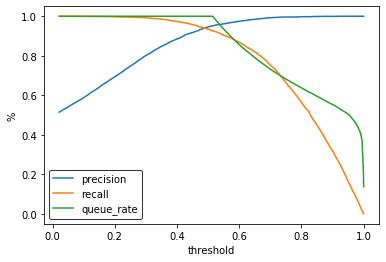

In [45]:
precision, recall, thresholds = precision_recall_curve(labels, model.predict_proba(bow)[:, 1])
thresholds = np.append(thresholds, 1)

queue_rate = []
for threshold in thresholds:
    queue_rate.append((precision >= threshold).mean())

plt.plot(thresholds, precision, color=sns.color_palette()[0])
plt.plot(thresholds, recall, color=sns.color_palette()[1])
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2])

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True)
leg.get_frame().set_edgecolor('k')
plt.xlabel('threshold')
plt.ylabel('%')
plt.show()

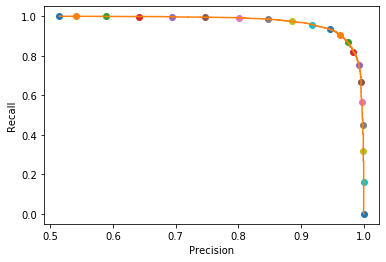

In [46]:
precision, recall, threshold = precision_recall_curve(labels, model.predict_proba(bow)[:, 1])

for i in range(21):
    close_point = np.argmin(np.abs(threshold - (i * 0.05)))
    plt.plot(precision[close_point], recall[close_point], 'o')

plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()